In [1]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Downloads the updated csv for the 2023 season
import gdown

def update_df():
    '''
    Download most recent csv file, concat with rest of data, return the full df
    '''
    output = "lol_2023.csv" #What to save the downloaded file as
    id = "1XXk2LO0CsNADBB1LRGOV5rUpyZdEZ8s2" #The id from the google drive file
    gdown.download(id=id, output=output, quiet=False)
    
    df_2021 = pd.read_csv('lol_2021.csv')
    df_2022 = pd.read_csv('lol_2022.csv')
    df_2023 = pd.read_csv('lol_2023.csv')
    df = pd.concat([df_2021,df_2022,df_2023])
    return df

def get_wiki():
    '''
    Returns chart from wikipedia containing info for Tier 1 and Tier 2 leagues
    Returns tier1, tier2
    '''
    wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_League_of_Legends_leagues_and_tournaments')
    return wiki[1], wiki[3]

def wrangle_df(df):
    leagues = ['LCK','LPL','LEC','LCS','PCS','VCS','CBLOL','LJL','LLA'] # These are my 9 tier 1 leagues that I'll keep
    
    df = df[df.league.isin(leagues)]
    df = df[df.position=='team']

    cols = ['teamname','league', 'date', 'side', 'gamelength','game', 'result', 'teamkills', 
            'teamdeaths', 'firstblood', 'position', 'dragons', 'barons', 'opp_barons','towers', 'opp_towers', 
            'inhibitors', 'opp_inhibitors', 'damagetochampions', 'damagetakenperminute', 'wardsplaced', 'wardskilled', 
            'controlwardsbought', 'totalgold', 'gspd']

    df = df[cols]
    df = df.dropna()
    
    df.date = pd.to_datetime(df.date,infer_datetime_format=True)
    del df['position']
    df = df.sort_values('date')
    df = df.reset_index(drop=True)
    df.side = np.where(df.side=='Blue',1,0)
    df.rename(columns={'side':'blue_side'},inplace = True)
    
    df.to_csv('final.csv')
    
    return df

def get_train(df):
    train_len = int(df.shape[0]*.6)
    train = df.iloc[:train_len]
    return train
    

In [3]:
df = update_df()
df = wrangle_df(df)

Downloading...
From: https://drive.google.com/uc?id=1XXk2LO0CsNADBB1LRGOV5rUpyZdEZ8s2
To: /Users/thegootch/codeup-data-science/league/lol_2023.csv
100%|██████████████████████████████████████| 8.99M/8.99M [00:02<00:00, 3.81MB/s]
/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_87636/1236272213.py:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  df = update_df()


In [4]:
df = pd.read_csv('final.csv',index_col=0)

In [5]:
df = df.sort_values(['date','game'])

In [6]:
df.head(30)

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd
0,Top Esports,LPL,2021-01-09 09:22:04,1,2050,1.0,0,3,9,1.0,2.0,0.0,1.0,3.0,6.0,0.0,1.0,63315.0,2559.0146,101.0,83.0,40.0,54617,-0.000467
1,Suning,LPL,2021-01-09 09:22:04,0,2050,1.0,1,9,3,0.0,2.0,1.0,0.0,6.0,3.0,1.0,0.0,58406.0,2940.4390,161.0,61.0,46.0,60520,0.000467
2,Top Esports,LPL,2021-01-09 10:16:20,1,2241,2.0,0,16,27,0.0,3.0,2.0,0.0,6.0,7.0,0.0,2.0,84516.0,3790.4150,121.0,73.0,42.0,69692,-0.015474
3,Suning,LPL,2021-01-09 10:16:20,0,2241,2.0,1,27,17,1.0,2.0,0.0,2.0,7.0,6.0,2.0,0.0,97504.0,3192.6372,155.0,55.0,49.0,70269,0.015474
4,Oh My God,LPL,2021-01-09 11:30:25,1,1887,1.0,0,4,15,1.0,1.0,0.0,1.0,3.0,9.0,0.0,1.0,37351.0,2777.9332,104.0,47.0,32.0,51145,-0.028532
5,EDward Gaming,LPL,2021-01-09 11:30:25,0,1887,1.0,1,15,4,0.0,4.0,1.0,0.0,9.0,3.0,1.0,0.0,54707.0,2028.2353,93.0,58.0,34.0,60738,0.028532
6,EDward Gaming,LPL,2021-01-09 12:23:44,1,2010,2.0,0,8,18,0.0,1.0,0.0,1.0,2.0,11.0,0.0,3.0,68437.0,3197.7313,87.0,53.0,39.0,54258,-0.077071
7,Oh My God,LPL,2021-01-09 12:23:44,0,2010,2.0,1,18,8,1.0,4.0,1.0,0.0,11.0,2.0,3.0,0.0,67004.0,3283.9701,105.0,42.0,33.0,64618,0.077071
8,Oh My God,LPL,2021-01-09 13:19:06,1,2159,3.0,0,8,16,1.0,3.0,0.0,1.0,3.0,9.0,0.0,2.0,61473.0,2297.1746,111.0,44.0,45.0,57889,-0.081391
9,EDward Gaming,LPL,2021-01-09 13:19:06,0,2159,3.0,1,16,8,0.0,3.0,1.0,0.0,9.0,3.0,2.0,0.0,59864.0,2844.3168,105.0,64.0,42.0,67747,0.081391


In [7]:
train = get_train(df)

In [8]:
numerical = train.select_dtypes(['int','float']).columns

<BarContainer object of 12842 artists>

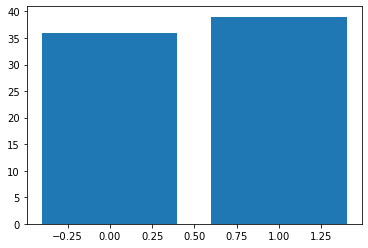

In [9]:
plt.bar(df.result,df.teamkills)

In [10]:
df.corr()['result'].sort_values() #Worth exploring gspd, barons, dragons, damagetochampions, firstblood, wardskilled

opp_towers             -8.927737e-01
opp_inhibitors         -7.615534e-01
teamdeaths             -7.043899e-01
opp_barons             -6.401633e-01
damagetakenperminute   -2.323973e-01
gamelength              9.891778e-18
game                    1.274873e-16
controlwardsbought      1.170784e-03
blue_side               4.656596e-02
wardsplaced             5.325245e-02
wardskilled             1.354198e-01
firstblood              2.318954e-01
damagetochampions       3.048043e-01
totalgold               4.411000e-01
dragons                 5.964055e-01
barons                  6.401633e-01
teamkills               7.054282e-01
gspd                    7.549303e-01
inhibitors              7.615534e-01
towers                  8.927737e-01
result                  1.000000e+00
Name: result, dtype: float64

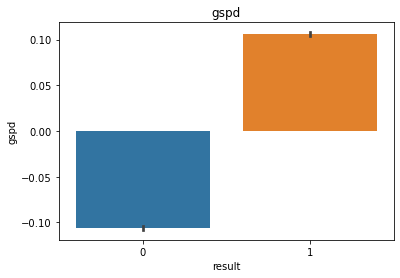

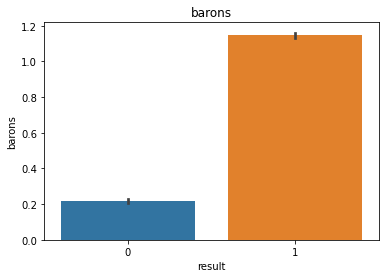

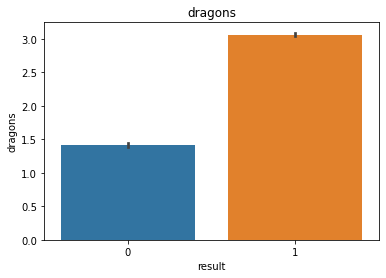

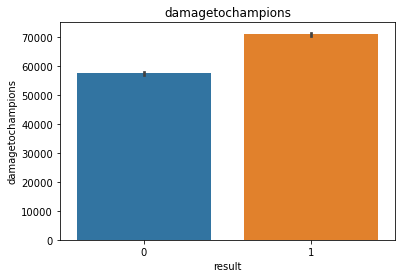

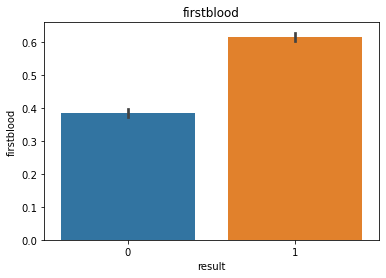

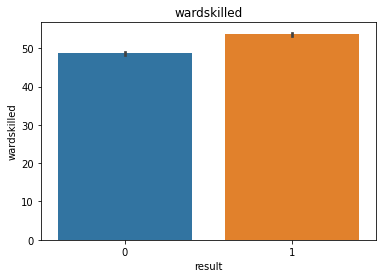

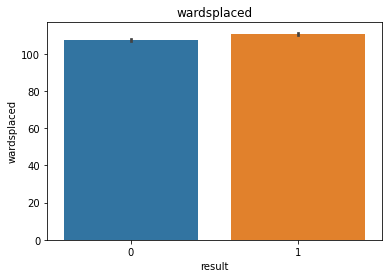

ValueError: Could not interpret input 'side'

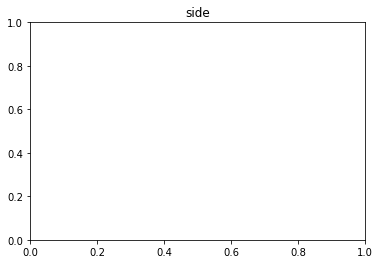

In [11]:
columns = ['gspd', 'barons', 'dragons', 'damagetochampions', 'firstblood', 'wardskilled','wardsplaced','side']

for c in columns:
    plt.title(c)
    sns.barplot(data=df,x='result',y=c)
    plt.show()

In [12]:
def create_target(groupby):
    groupby['target']=groupby['result'].shift(-1)
    return groupby

In [13]:
df = df.groupby('teamname').apply(create_target)
df.loc[pd.isnull(df.target),'target'] =2
df.target = df.target.astype(int,errors='ignore')

In [14]:
# Create an 'opp_name' column for each row
evens = range(0,df.shape[0],2)
odds = range(1,df.shape[0],2)

pairs = [(a,b) for a,b in zip(evens,odds)] # list of tuples

def add_opp_name(df,tup): #tup = list of tuples
    for t in tup: #iterate through list of tuples
        a,b= t #unpack each tuple into two values
        df.loc[a,'opp_name']=df.teamname.loc[b] #create new column w/opp_name
        df.loc[b,'opp_name']=df.teamname.loc[a]
    return df

In [15]:
df = add_opp_name(df,pairs) #adds opponents' name

In [16]:
removed_columns = ['teamname','league','date','target','opp_name']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [17]:
from sklearn.preprocessing import MinMaxScaler #scale all numerical columns
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])


In [18]:
# Create rolling averages for columns, concat as new columns to df
cols = ['gamelength','teamkills','teamdeaths','firstblood','dragons','barons','opp_barons','towers','opp_towers',\
       'inhibitors','opp_inhibitors','damagetochampions','damagetakenperminute','wardsplaced','wardskilled',\
       'controlwardsbought','totalgold','gspd']

def rolling(team,roll):
    rolling = team.rolling(roll).mean()
    return team
    
df_rolling = df.groupby('teamname',group_keys=False)[cols].apply(rolling,10)

rolling_cols = [f'{col}_rolling' for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df,df_rolling],axis=1)

In [19]:
def next_opp(team):
    team['next_opp'] = team['opp_name'].shift(-1)
    return team

df = df.groupby('teamname').apply(next_opp)
df.loc[df.next_opp.isnull(),'next_opp'] = 2

In [20]:
def next_side(team):
    team['next_blue'] = team['blue_side'].shift(-1)
    return team

df = df.groupby('teamname').apply(next_side)
df.loc[df.next_blue.isnull(),'next_blue']=2
df.next_blue = df.next_blue.astype(int,errors='ignore')

In [21]:
def next_date(team):
    team['next_date'] = team['date'].shift(-1)
    return team

df = df.groupby('teamname').apply(next_date)
df.loc[df.next_date.isnull(),'next_date']=2

In [22]:
df[df.next_blue==2].head()

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd,target,opp_name,gamelength_rolling,teamkills_rolling,teamdeaths_rolling,firstblood_rolling,dragons_rolling,barons_rolling,opp_barons_rolling,towers_rolling,opp_towers_rolling,inhibitors_rolling,opp_inhibitors_rolling,damagetochampions_rolling,damagetakenperminute_rolling,wardsplaced_rolling,wardskilled_rolling,controlwardsbought_rolling,totalgold_rolling,gspd_rolling,next_opp,next_blue,next_date
1994,Cruzeiro eSports,CBLOL,2021-03-14 16:48:04,1.0,0.225149,0.00,1.0,0.564103,0.128205,1.0,0.666667,0.25,0.0,0.818182,0.272727,0.142857,0.000000,0.161715,0.453547,0.208191,0.162921,0.363636,0.325245,0.572873,2,KaBuM! e-Sports,0.225149,0.564103,0.128205,1.0,0.666667,0.25,0.0,0.818182,0.272727,0.142857,0.000000,0.161715,0.453547,0.208191,0.162921,0.363636,0.325245,0.572873,2,2,2
2286,eStar,LPL,2021-03-26 10:11:22,1.0,0.303857,0.25,0.0,0.153846,0.538462,1.0,0.166667,0.00,0.5,0.545455,0.909091,0.142857,0.142857,0.212549,0.422428,0.235495,0.247191,0.373737,0.301945,0.398733,2,Suning,0.303857,0.153846,0.538462,1.0,0.166667,0.00,0.5,0.545455,0.909091,0.142857,0.142857,0.212549,0.422428,0.235495,0.247191,0.373737,0.301945,0.398733,2,2,2
2879,MGN Box Esports,VCS,2021-05-20 08:35:38,0.0,0.262151,0.50,0.0,0.230769,0.512821,0.0,0.500000,0.00,0.5,0.181818,0.818182,0.000000,0.142857,0.146595,0.245578,0.262799,0.196629,0.262626,0.278375,0.286650,2,Burst The Sky Esports,0.262151,0.230769,0.512821,0.0,0.500000,0.00,0.5,0.181818,0.818182,0.000000,0.142857,0.146595,0.245578,0.262799,0.196629,0.262626,0.278375,0.286650,2,2,2
4801,FC Schalke 04 Esports,LEC,2021-08-01 16:27:31,1.0,0.334274,0.00,0.0,0.205128,0.435897,1.0,0.333333,0.00,0.5,0.454545,1.000000,0.142857,0.714286,0.219828,0.437258,0.337884,0.314607,0.333333,0.324114,0.379343,2,Fnatic,0.334274,0.205128,0.435897,1.0,0.333333,0.00,0.5,0.454545,1.000000,0.142857,0.714286,0.219828,0.437258,0.337884,0.314607,0.333333,0.324114,0.379343,2,2,2
4927,Rogue Warriors,LPL,2021-08-06 12:07:20,0.0,0.245218,0.25,1.0,0.589744,0.256410,1.0,0.333333,0.50,0.0,0.636364,0.454545,0.142857,0.000000,0.236528,0.341434,0.163823,0.269663,0.242424,0.376910,0.488423,2,JD Gaming,0.245218,0.589744,0.256410,1.0,0.333333,0.50,0.0,0.636364,0.454545,0.142857,0.000000,0.236528,0.341434,0.163823,0.269663,0.242424,0.376910,0.488423,2,2,2


In [23]:
full = df.merge(df[rolling_cols + ["next_opp", "next_date", "teamname"]], left_on=["teamname", "next_date"], \
                right_on=["next_opp", "next_date"])

In [29]:
full.next_blue.value_counts()

1    6338
0    6338
Name: next_blue, dtype: int64

<AxesSubplot:xlabel='result', ylabel='blue_side'>

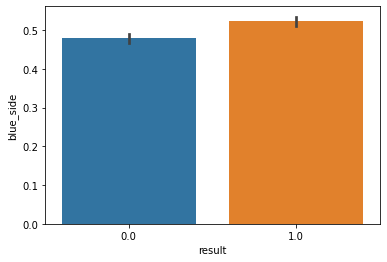

In [30]:
sns.barplot(data = full, x='result',y='blue_side')

In [39]:
len(df[(df.blue_side==1) & (df.result == 1)])/(df.shape[0]/2) #Establishes a baseline - blue team wins 52% of time

0.5232829777293256

In [106]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha=1)
rf = RandomForestClassifier(max_depth=3, max_samples = .4, n_estimators = 100)
split = TimeSeriesSplit(n_splits=3)
sfs = SequentialFeatureSelector(rf, n_features_to_select=20,direction='forward',cv=split,n_jobs=-1)

In [107]:
removed_columns = list(full.columns[full.dtypes=='object']) + removed_columns
selected_columns = full.columns[~full.columns.isin(removed_columns)]

In [108]:
sfs.fit(full[selected_columns],full['target'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RandomForestClassifier(max_depth=3,
                                                           max_samples=0.4),
                          n_features_to_select=20, n_jobs=-1)

In [109]:
selectors = selected_columns[sfs.get_support()]

In [110]:
predictions = backtest(full,rr,selectors,'target')

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions.actual,predictions.prediction)

0.5691138674712258

In [133]:
def near_split(x, num_bins): #Split my df into equal splits to perform backtesting
    quotient, remainder = divmod(x, num_bins)
    bins = [quotient + 1] * remainder + [quotient] * (num_bins - remainder)
    count = 0
    new_list = []
    for b in bins:
        count += b
        new_list.append(count)
    return new_list

splits = near_split(df.shape[0],5)
last_split = splits[4]-splits[3] #Difference between last two values for final 'test' set

In [134]:
def backtest(data,model,predictors,target):
    all_predictions= []
    
    for i in range(0,len(splits)-1):
        train = data.loc[:splits[i]]
        test = data.loc[splits[i]:splits[i]+last_split]
        
        model.fit(train[predictors],train[target])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds,index=test.index)
        combined = pd.concat([test[target],preds],axis=1)
        combined.columns = ['actual','prediction']
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)
        
        
        
        


In [135]:
predictions = backtest(full,rr,selectors,'target')

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions.actual,predictions.prediction)

0.5564348600257196

### optimize ridge regression

In [137]:
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [138]:
X = full[selectors]
y = full['target']

In [139]:
pca = decomposition.PCA()
ridge = linear_model.Ridge()

In [140]:
pipe = Pipeline(steps=[("pca", pca),
                        ("ridge", ridge)])

In [141]:
n_components = list(range(1,X.shape[1]+1,1))
normalize = [True, False]
solver = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
parameters = dict(pca__n_components=n_components,
                      ridge__normalize=normalize,
                      ridge__solver=solver)

In [142]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('ridge', Ridge())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20],
                         'ridge__normalize': [True, False],
                         'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                           'sparse_cg', 'sag', 'saga']})

In [ ]:
print("Best Number Of Components:", clf_GS.best_estimator_.get_params()["pca__n_components"])
print(); print(clf_GS.best_estimator_.get_params()["ridge"])

CV_Result = cross_val_score(clf_GS, X, y, cv=10, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Number Of Components: 14

Ridge(solver='sag')
